In [1]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium
import seaborn as sb
from IPython.display import HTML


# Enable inline plotting
%matplotlib inline

#### Create a dataframe from data in train.csv

In [2]:
train_path = r'../../data/train.csv'
train = pd.read_csv(train_path)

In [21]:
 pd.options.plotting.backend = 'sb'

ValueError: Could not find plotting backend 'sb'. Ensure that you've installed the package providing the 'sb' entrypoint, or that the package has a top-level `.plot` method.

# Task 1: Data Exploration

### Query 1.1

,Counts,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighbourhood,...,minimum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,instant_bookable,cancellation_policy,month,room_type
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,24765,24765,24744,24566,17454,24763,20838,24763,24763,24545,...,24765,24765,24765,19632,19632,19479,24765,24765,24765,Entire home/apt
Private room,3223,3223,3214,3134,1689,3223,2129,3223,3223,3183,...,3223,3223,3223,1679,1679,1637,3223,3223,3223,Private room
Shared room,134,134,134,133,69,134,100,134,134,133,...,134,134,134,89,89,89,134,134,134,Shared room


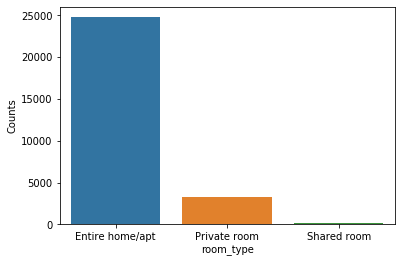

In [24]:
q1 = train.groupby(['room_type']).count().sort_values(by='id', ascending=False)
q1 = q1.rename(columns={q1.columns[0]: 'Counts'})
q1['room_type'] = q1.index
sb.barplot(x='room_type', y=q1.columns[0], data = q1)
q1

In [4]:
q1.head(n=1).filter(items=[])

""
room_type
Entire home/apt


### Query 1.2

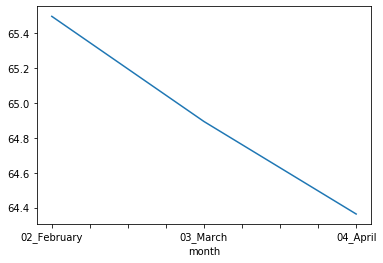

In [5]:
train.groupby(['month'])['price'].mean().plot()

### Query 1.3

In [6]:
q3 = train.groupby(['neighbourhood']).sum()
q3 = q3.sort_values('number_of_reviews', ascending = False)
q3.head(5).filter(items=['number_of_reviews'])

,number_of_reviews
neighbourhood,
Plaka,132361
Koukaki,90357
Neos Kosmos,83348
Psyri,54353
Metaxourgeio,44792


### Query 1.4

In [7]:
q4 = train.groupby(['neighbourhood']).count()
q4 = q4.sort_values(['id'], ascending = False)
q4.head(1).filter(items=[])

""
neighbourhood
Plaka


### Query 1.5

##### By neighbourhood

In [8]:
q5_neigh = train.groupby(['neighbourhood']).count()
q5_neigh = q5_neigh.rename(columns={'id': 'count'})
q5_neigh.filter(items=['neighbourhood','count'])

,count
neighbourhood,
Agios Loukas,209
Agios Nikolaos,611
Akadimia Platonos,114
Ambelokipi,1482
Attiki,758
Exarcheia,1330
Gazi,282
Goudi,87
Ilisia,502


##### By month

In [9]:
q5_month = train.groupby(['month']).count()
q5_month = q5_month.rename(columns={'id': 'count'})
q5_month.filter(items=['count'])

,count
month,
02_February,9100
03_March,9361
04_April,9661


### Query 1.6

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f919fd12910>]],
      dtype=object)

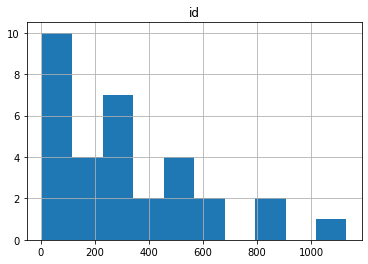

In [10]:
q6 = train.drop_duplicates(subset='id').groupby(['neighbourhood']).count()
q6.hist(column = 'id')

### Query 1.7

In [11]:
q7 = train.groupby(['neighbourhood','room_type']).count().sort_values('neighbourhood').groupby(level=0).head(1)
q7.filter(items='id')

,
neighbourhood,room_type
Agios Loukas,Entire home/apt
Agios Nikolaos,Entire home/apt
Akadimia Platonos,Entire home/apt
Ambelokipi,Shared room
Attiki,Entire home/apt
Exarcheia,Entire home/apt
Gazi,Entire home/apt
Goudi,Private room
Ilisia,Entire home/apt


### Query 1.8

In [12]:
q8 = train.groupby(['room_type']).mean()
q8 = q8.sort_values(['price'], ascending=False)
q8.head(1).filter(items=['price'])

,price
room_type,
Private room,80.300031


### Query 1.9

In [13]:
map = folium.Map(location = [37.983810, 23.727539], zoom_start=13)
#map

In [14]:
q9 = train[train.month == '04_April'].filter(items=['name', 'description', 'neighbourhood', 'latitude','longitude', 'room_type', 'price'])
q9 = q9.sample(1000, random_state=30)

for index, row in q9.iterrows():
    pop = row['room_type'] + ' ' + '$' +  str(row['price'])
    folium.Marker([row['latitude'], row['longitude']], popup=pop, tooltip = row['name']).add_to(map)

map

In [15]:
#map.save('april_listings.html')

In [16]:
#HTML(filename='april_listings.html')